## Exploratory Data Analysis

####  Reading the Libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import re
import string
from nltk.corpus import words
# Removing punctuations from the text
import string
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('ASAP Dataset/training_set_rel3.tsv', sep = '\t',
                encoding = 'ISO-8859-1')

In [10]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


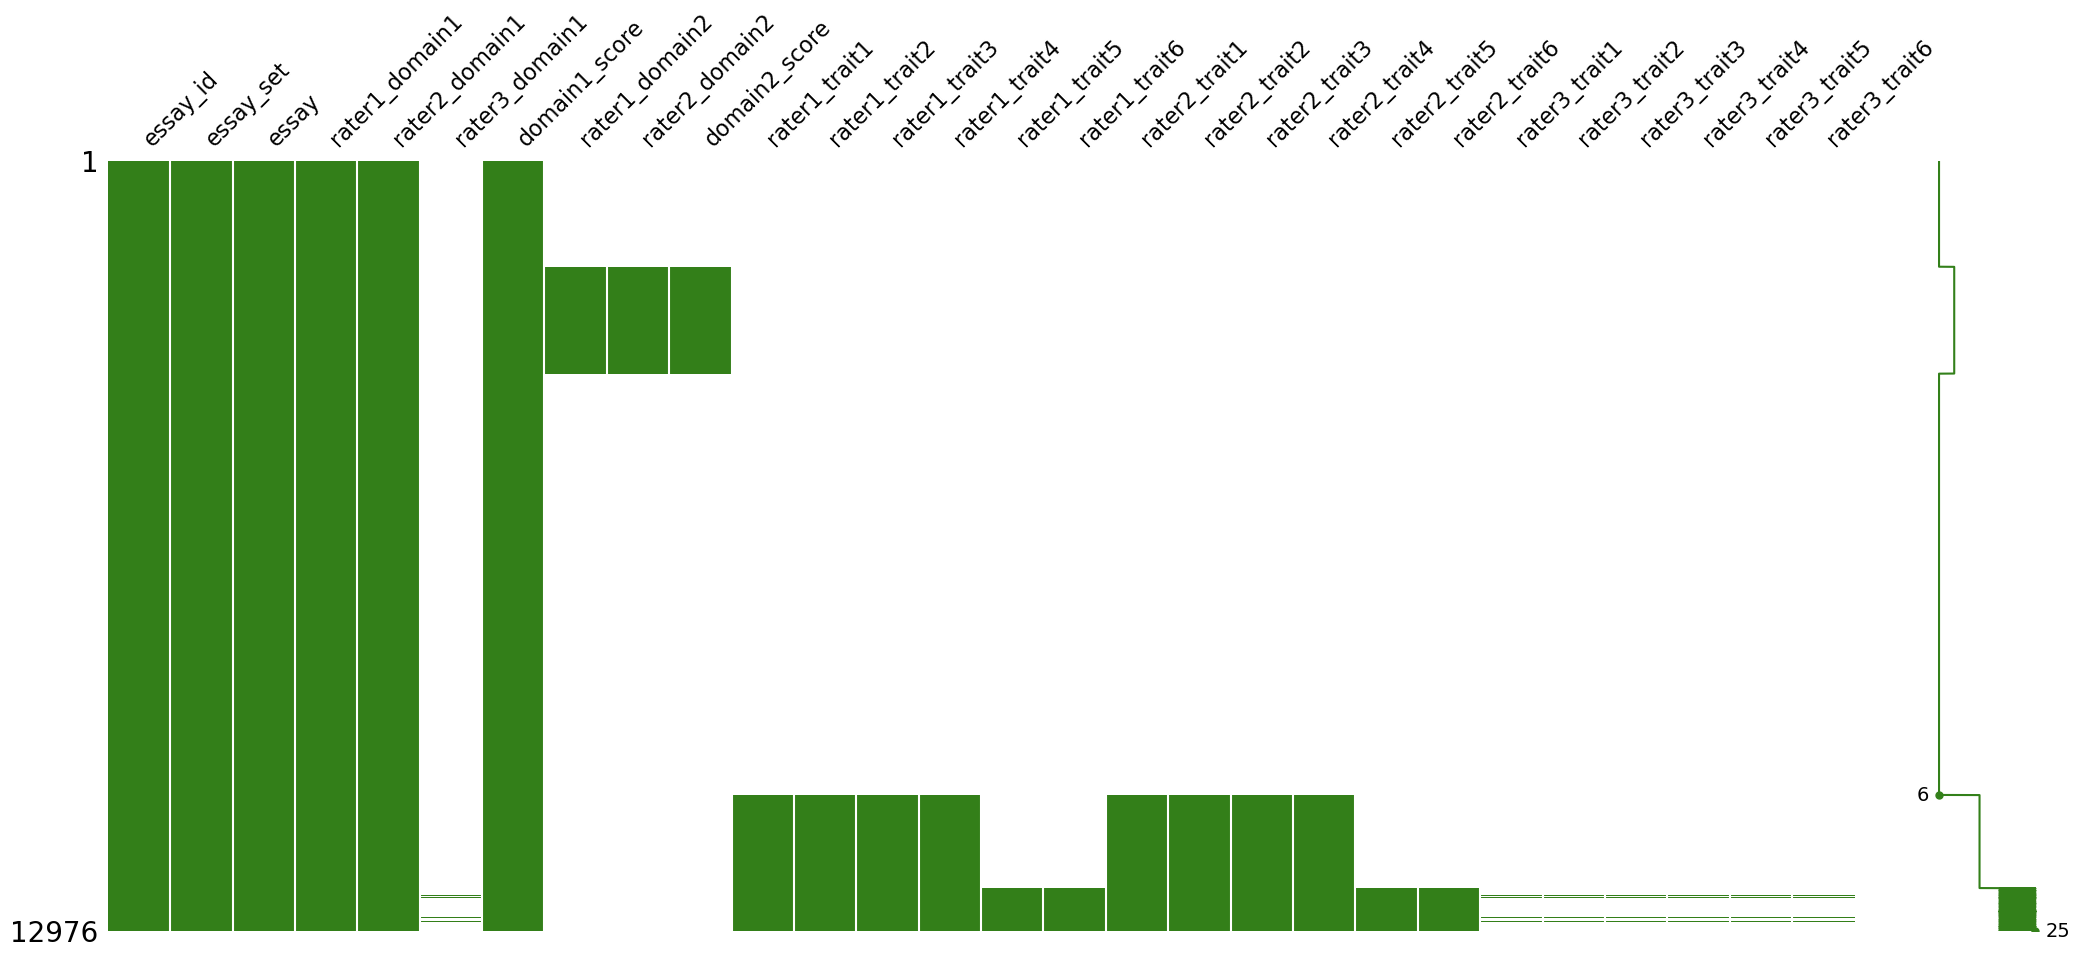

In [13]:
# Plots the missing values for each of the features in the dataset
msno.matrix(df, color = (0.2, 0.5, 0.1))
plt.show()

In [14]:
df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12976.000000,12976.000000,12976.000000,12976.000000,128.000000,12976.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.395808,4.179485,4.127158,4.137408,37.828125,6.800247,3.333889,3.330556,3.333889,2.444154,...,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6309.074105,2.136913,4.212544,4.264330,5.240829,8.970705,0.729103,0.726807,0.729103,1.211730,...,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4438.750000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10044.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15681.250000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [6]:
# Printing the maximum number of characters in the train data
df['full_text'].apply(lambda x: len(x)).max()

6044

In [7]:
# Printing the minimum number of characters in the train data
df['full_text'].apply(lambda x: len(x)).min()

82

In [8]:
# Printing the maximum number of words in the train data
df['full_text'].apply(lambda x: len(x.split(' '))).max()

5061

In [9]:
# Printing the minimum number of words in the train data
df['full_text'].apply(lambda x: len(x.split(' '))).min()

11

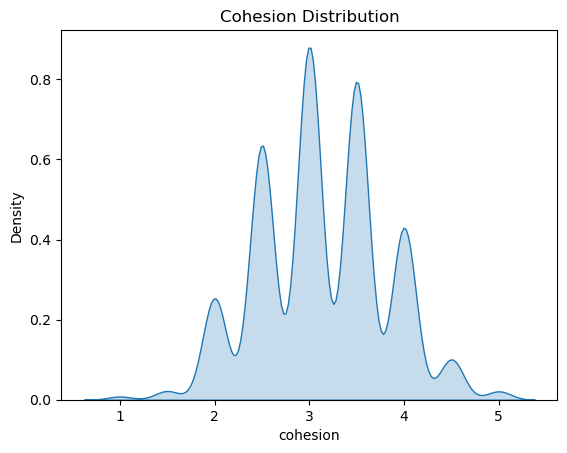

In [10]:
sns.kdeplot(df['cohesion'], fill = True)
plt.title("Cohesion Distribution")
plt.show()

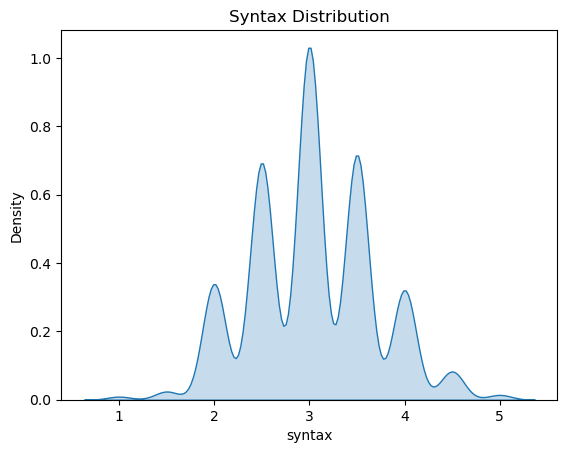

In [11]:
sns.kdeplot(df['syntax'], fill = True)
plt.title("Syntax Distribution")
plt.show()

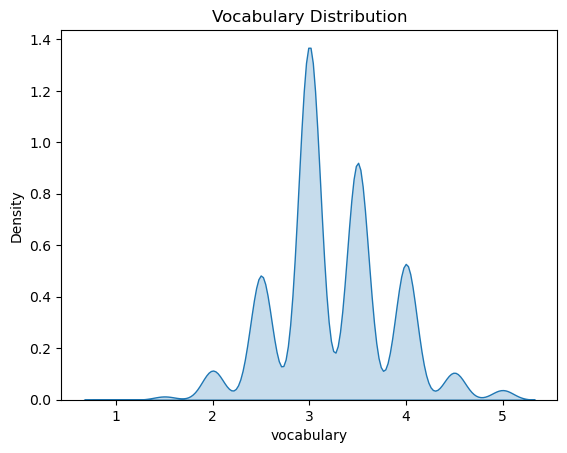

In [12]:
sns.kdeplot(df['vocabulary'], fill = True)
plt.title("Vocabulary Distribution")
plt.show()

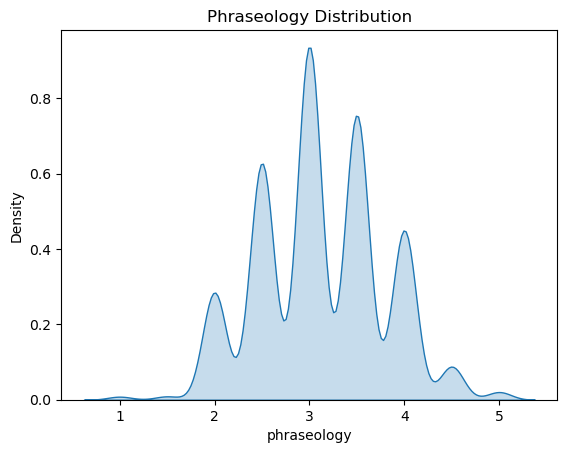

In [13]:
sns.kdeplot(df['phraseology'], fill = True)
plt.title("Phraseology Distribution")
plt.show()

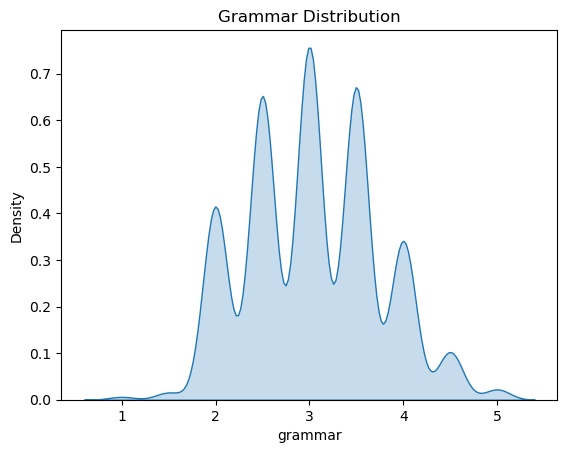

In [14]:
sns.kdeplot(df['grammar'], fill = True)
plt.title("Grammar Distribution")
plt.show()

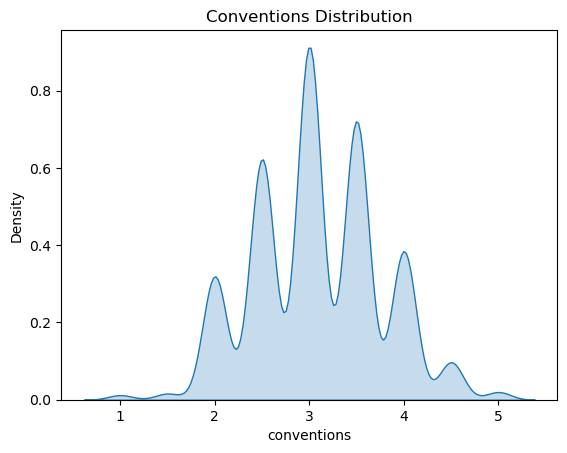

In [15]:
sns.kdeplot(df['conventions'], fill = True)
plt.title("Conventions Distribution")
plt.show()

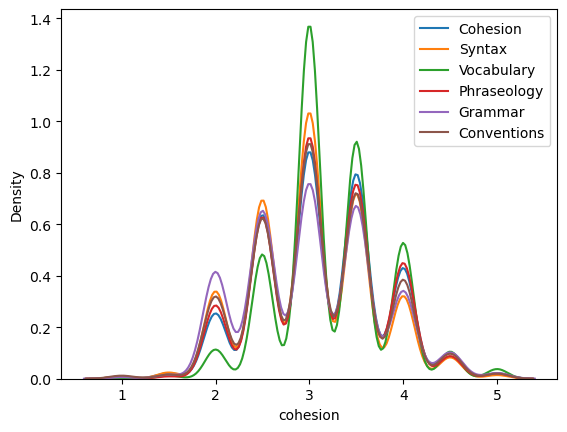

In [16]:
sns.kdeplot(df['cohesion'], label = 'Cohesion')
sns.kdeplot(df['syntax'], label = 'Syntax')
sns.kdeplot(df['vocabulary'], label = 'Vocabulary')
sns.kdeplot(df['phraseology'], label = 'Phraseology')
sns.kdeplot(df['grammar'], label = 'Grammar')
sns.kdeplot(df['conventions'], label = 'Conventions')

plt.legend()
plt.show()

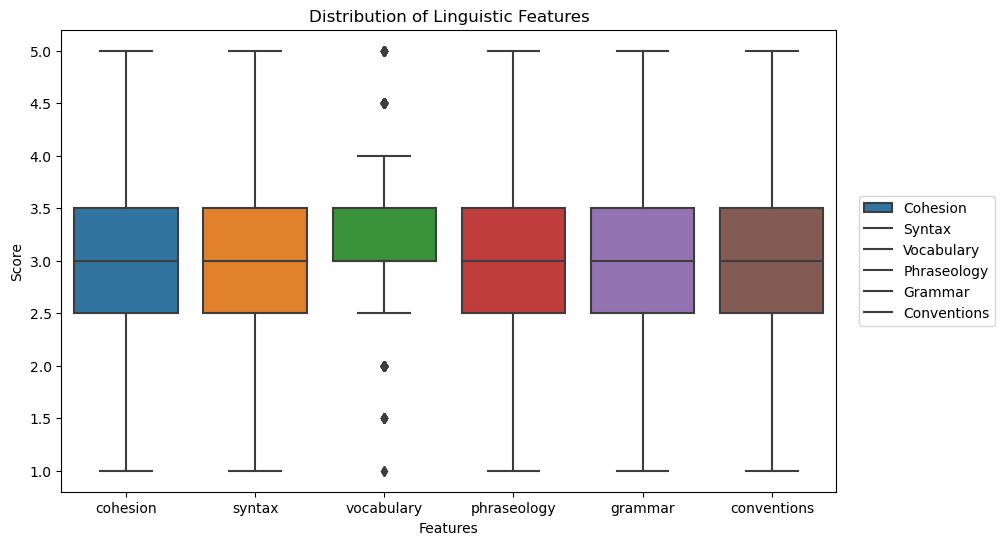

In [20]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create boxplots for each variable
sns.boxplot(data=df[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']], orient='v')

# Add title and axis labels
plt.title('Distribution of Linguistic Features')
plt.xlabel('Features')
plt.ylabel('Score')

# Move legend outside the figure and set font size
plt.legend(labels=['Cohesion', 'Syntax', 'Vocabulary', 'Phraseology', 'Grammar', 'Conventions'], loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize='medium')

# Show the plot
plt.show()

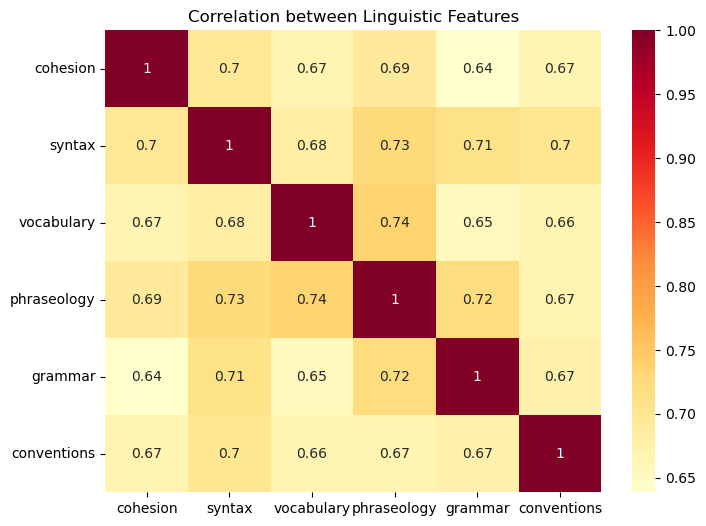

In [24]:
# Create a correlation matrix
corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')

# Add title
plt.title('Correlation between Linguistic Features')

# Show the plot
plt.show()

In [36]:
df['full_text'].iloc[0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [37]:
# Testing to check and replace '\n' from the text and make a cleaner text
df['full_text'].iloc[0].replace('\n', '')

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.The hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.most students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go take a sh

In [38]:
df['full_text_preprocessed'] = df['full_text'].apply(lambda x: x.replace('\n', ''))

In [39]:
# Checking to see if the preprocessed text does not contain '\n' characters
df['full_text_preprocessed'].iloc[0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.The hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.most students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go take a sh

In [40]:
translator = str.maketrans('', '', string.punctuation)
df['full_text_preprocessed'] = df['full_text_preprocessed'].apply(lambda x: x.translate(translator))

In [41]:
df['full_text_preprocessed'].iloc[0]

'I think that students would benefit from learning at homebecause they wont have to change and get up early in the morning to shower and do there hair taking only classes helps them because at there house theyll be pay more attention they will be comfortable at homeThe hardest part of school is getting ready you wake up go brush your teeth and go to your closet and look at your cloths after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain Then youll have to change with the online classes you can wear anything and stay home and you wont need to stress about what to wearmost students usually take showers before school they either take it before they sleep or when they wake up some students do both to smell good that causes them do miss the bus and effects on there lesson time cause they come late to school when u have online classes u wont need to miss lessons cause you can get everything set up and go take a shower and when u

In [42]:
df['full_text'].iloc[0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [43]:
def text_preprocessing(text, english_words = words):

    # Get a list of all English words
    english_words = set(english_words.words())

    # Define a regular expression to match only alphanumeric characters
    regex = re.compile('[^a-zA-Z0-9\s]')

    # Remove all punctuation characters and convert to lowercase
    text = regex.sub('', text.lower())

    # Split the text into words
    words = text.split()

    # Filter out words that are not English words
    english_words_only = [word for word in words if word in english_words]

    # Join the English words into a string
    english_text = ' '.join(english_words_only)
    
    return english_text

In [44]:
# This can take about 5 minutes to run 
df['full_text'].apply(text_preprocessing)

0       i think that would benefit from learning at th...
1       when a problem is a change you have to let it ...
2       dear principal if u change the school policy o...
3       the best time in life is when you become yours...
4       small act of kindness can impact in other peop...
                              ...                        
3906    i believe in class for education us only is id...
3907    working alone do not have to argue with other ...
3908    a problem is a chance for you to do your best ...
3909    many people disagree with quote example is not...
3910    do you think that failure is the main thing fo...
Name: full_text, Length: 3911, dtype: object

In [45]:
df['preprocessed_text'] = df['full_text'].apply(text_preprocessing)

In [46]:
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,full_text_preprocessed,preprocessed_text
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,I think that students would benefit from learn...,i think that would benefit from learning at th...
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,When a problem is a change you have to let it ...,when a problem is a change you have to let it ...
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,Dear PrincipalIf u change the school policy of...,dear principal if u change the school policy o...
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,The best time in life is when you become yours...,the best time in life is when you become yours...
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,Small act of kindness can impact in other peop...,small act of kindness can impact in other peop...


In [47]:
df.drop('full_text_preprocessed', axis = 1, inplace = True)

In [48]:
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,preprocessed_text
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,i think that would benefit from learning at th...
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,when a problem is a change you have to let it ...
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,dear principal if u change the school policy o...
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,the best time in life is when you become yours...
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,small act of kindness can impact in other peop...


In [50]:
# df.to_csv('Datasets/Preprocessed_df.csv', index = False)